## Getting Started with Creating Charts with Python

There are many Python packages available for creating charts.  Which one you use really depends on 
what the purpose of the final plot is.  For quick results, Pandas and Seaborn are quite popular.
For publication-ready plots, Matplotlib is a very common choice (the previous two packages are actually
wrappers around Matplotlib). And for interactive plots, you may want to try Plot.ly or Bokeh.

The first thing we need to do is connect to CAS and upload some data.  We are using the SAS CARS dataset in CSV form here.

In [1]:
import swat

conn = swat.CAS(host, port, username, password)

tbl = conn.read_csv('https://raw.githubusercontent.com/sassoftware/sas-viya-programming/master/data/cars.csv')
tbl.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
2,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,35940.0,32506.0,1.8,4.0,170.0,23.0,30.0,3638.0,105.0,180.0
3,Audi,A6 3.0 4dr,Sedan,Europe,Front,36640.0,33129.0,3.0,6.0,220.0,20.0,27.0,3561.0,109.0,192.0
4,Audi,A6 2.7 Turbo Quattro 4dr,Sedan,Europe,All,42840.0,38840.0,2.7,6.0,250.0,18.0,25.0,3836.0,109.0,192.0


Let's subset the data to just the sports cars using the **query** method of the CASTable object.  This works just like the **query** method on DataFrames.  We'll then download the data into a local DataFrame using the **head** method.  We've specified a maximum numer of rows as 1,000 here.  That will cover all of the sports cars in the result.  Finally, we'll add an index to the DataFrame that contains the make and model of the car.

In [2]:
sports = tbl.query('Type = "Sports"')
sports

CASTable('_T_8B0EB2BF_7F4B2B09A0C0', caslib='CASUSERHDFS(kesmit)', where='(Type = "Sports")')

In [3]:
df = sports.head(1000)
df.set_index(df['Make'] + ' ' + df['Model'], inplace=True)
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Audi RS 6 4dr,Audi,RS 6 4dr,Sports,Europe,Front,84600.0,76417.0,4.2,8.0,450.0,15.0,22.0,4024.0,109.0,191.0
BMW Z4 convertible 3.0i 2dr,BMW,Z4 convertible 3.0i 2dr,Sports,Europe,Rear,41045.0,37575.0,3.0,6.0,225.0,21.0,29.0,2998.0,98.0,161.0
Jaguar XKR convertible 2dr,Jaguar,XKR convertible 2dr,Sports,Europe,Rear,86995.0,79226.0,4.2,8.0,390.0,16.0,23.0,4042.0,102.0,187.0
Mazda RX-8 4dr manual,Mazda,RX-8 4dr manual,Sports,Asia,Rear,27200.0,25179.0,1.3,NaN,238.0,18.0,24.0,3029.0,106.0,174.0
Mercedes-Benz SLK230 convertible 2dr,Mercedes-Benz,SLK230 convertible 2dr,Sports,Europe,Rear,40320.0,37548.0,2.3,4.0,192.0,21.0,29.0,3055.0,95.0,158.0


Now that we have some data to work with, let's create some charts.  To enable Matplotlib to embed images directly in the notebook, use the `%matplotlib` magic command. This works with Pandas plotting, Seaborn, and Matplotlib charts.

In [4]:
%matplotlib inline

### Pandas `plot` Method

Pandas DataFrames have a property called **plot** that makes it easy to create quick charts from the
data in the DataFrame.  In older versions of Pandas, **plot** was a method with a **kind=** attribute that
indicated the type of plot to create.  Newer versions of **plot** have methods for each individual 
plot type such as bar, scatter, line, etc.

In the example below, we are subsetting the DataFrame to only include MSRP and Invoice, then we are
calling the **plot.bar** method to create bar charts of the columns in subplots.  We will also use
the rot= parameter to rotate the x axis labels.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f08dbe1b358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f08dbfb0860>], dtype=object)

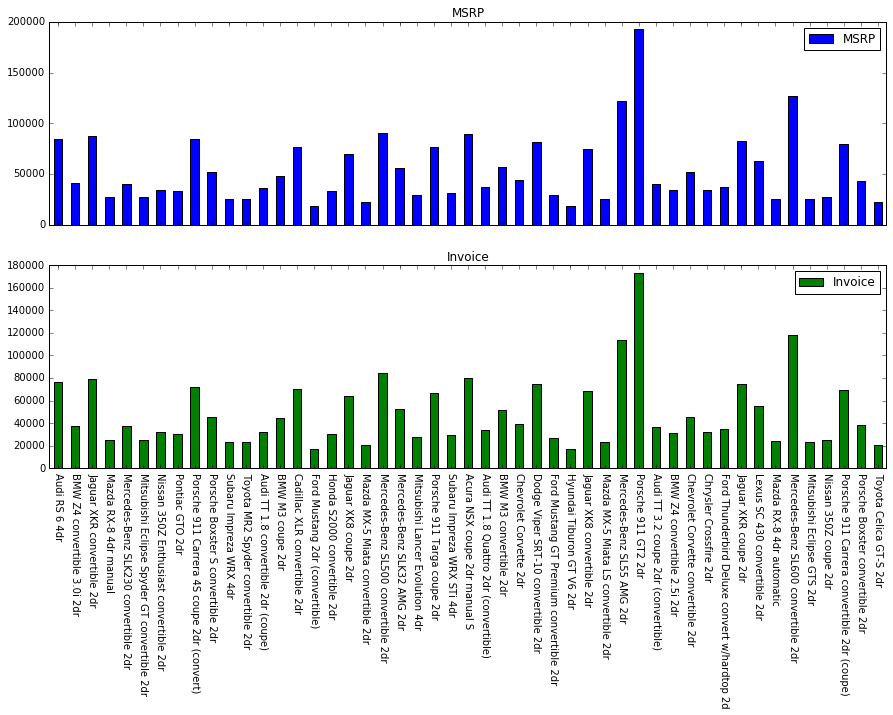

In [5]:
df[['MSRP', 'Invoice']].plot.bar(figsize=(15, 8), rot=-90, subplots=True)

### Creating Charts using Seaborn

The next step up from the **plot** method of DataFrames is using the Seaborn package.  This package 
is a wrapper around Matplotlib that takes some of the work out of creating graphs and adds new
ways of styling charts.

The code below creates a figure that contains two subplots as we did before.  Seaborn is then used to 
create bar charts in each of the axes.  Finally, the x axis labels are overridden so that they can be 
rotated -90 degrees as we did before.

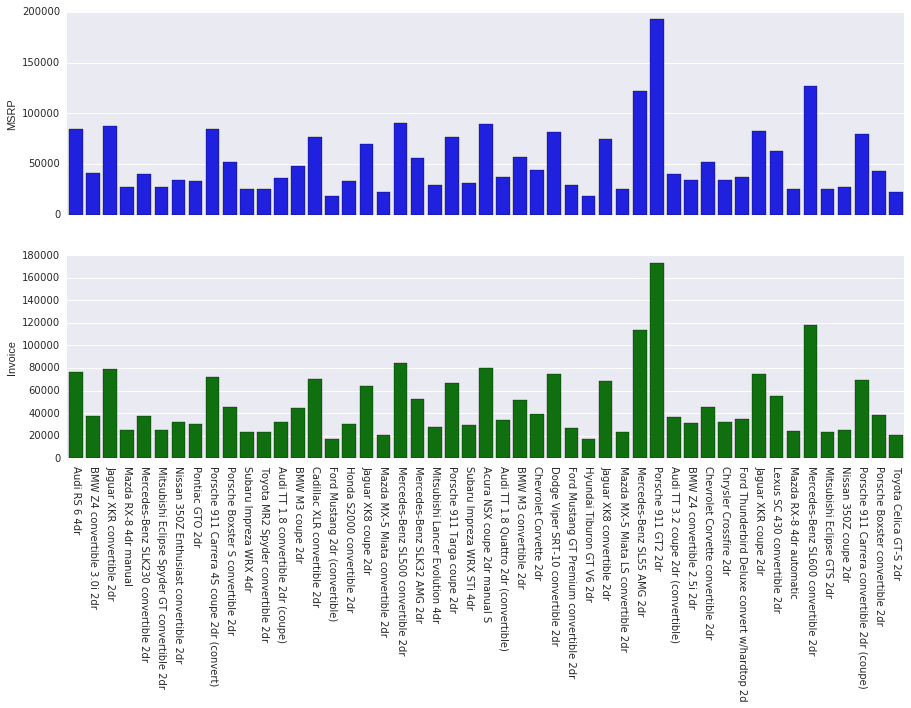

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

bar = sns.barplot(df.index, df['MSRP'], ax=ax1, color='blue')
ax1.set_ylabel('MSRP')

bar2 = sns.barplot(df.index, df['Invoice'], ax=ax2, color='green')
ax2.set_ylabel('Invoice')

labels = bar2.set_xticklabels(df.index, rotation=-90)

### Using Matplotlib Directly

The final entry is the static graphics line is Matplotlib itself.  Panda's **plot** method and Seaborn are 
just wrappers around Matplotlib, but you can still use Matplotlib directly.  For this case, it doesn't look 
a lot different than the Seaborn case.  You'll noticed that we have to do a bit more adjustment of labels
on the x axis and the x axis is a bit wider than it needs to be.  Seaborn just helps out with those details
automatically.

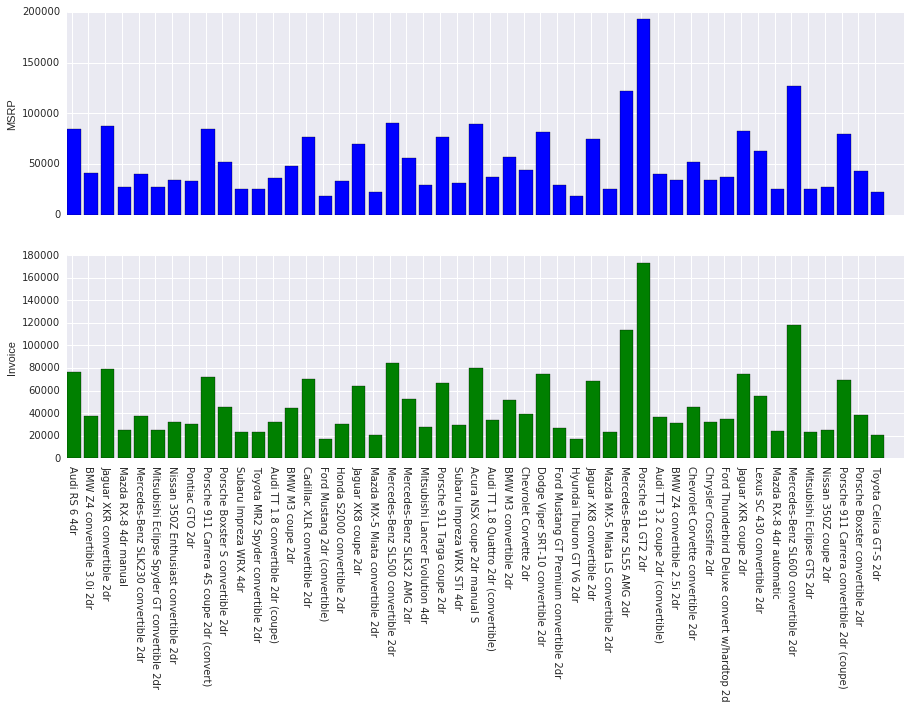

In [7]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

ax1.bar(range(len(df.index)), df['MSRP'], color='blue')
ax1.set_ylabel('MSRP')

ax2.bar(range(len(df.index)), df['Invoice'], color='green')
ax2.set_ylabel('Invoice')

ax2.set_xticks([x + 0.25 for x in range(len(df.index))])
labels = ax2.set_xticklabels(df.index, rotation=-90)

### Using Plot.ly and Cufflinks

The Plot.ly package can be used a couple of different ways.  There's the Plot.ly API that uses standard
Python structures as inputs, and there is an additional package called Cufflinks that integrates 
Plot.ly charts into Pandas DataFrames.  Since we have our data in a DataFrame, it's easier to use 
Cufflinks to start.

The code below uses Cufflinks' **iplot** method on the DataFrame.  The **iplot** method works much like the
standard **plot** method on DataFrames except that it uses Plot.ly as the back-end rather than 
Matplotlib.  After importing cufflinks, we use the **go_offline** function to indicate that we are using
local graphics rather than the hosted Plot.ly service.

The benefit to Plot.ly graphics is that they are interactive when viewed in a web browser.

In [8]:
import cufflinks as cf

cf.go_offline()

df[['MSRP', 'Invoice']].iplot(kind='bar', subplots=True, shape=(2, 1), shared_xaxes=True)

To do a similar plot using the standard Plot.ly API takes a bit more work.

In [9]:
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode()

data = [
    go.Bar(x=df.index, y=df.MSRP, name='MSRP'),
    go.Bar(x=df.index, y=df.Invoice, name='Invoice')
]

fig = tools.make_subplots(rows=2, cols=1, shared_xaxes=True, print_grid=True)
fig.append_trace(data[0], 1, 1)
fig.append_trace(data[1], 2, 1)

fig['layout']['height'] = 700
fig['layout']['margin'] = dict(b=250)

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



## Creating Charts with Bokeh

Bokeh is a popular graphics library for Python.  The charting functionality is a more recent addition, so it isn't as mature as some of the other libraries here.  However, it is an extremeley powerful and popular Python package.  This chart could still use some work with label orientation and doing the two pieces as subplots rather than separate plots, but the functionality doesn't appear to exist in this release.

In [10]:
from bokeh.charts import Bar, show
from bokeh.io import output_notebook

output_notebook()

try: show(Bar(df, values='MSRP', ylabel='MSRP', width=1000, height=400, color='blue'))
except: pass
try: show(Bar(df, values='Invoice', ylabel='Invoice', width=1000, height=400, color='green'))
except: pass

Loading BokehJS ...

In [11]:
conn.close()

## Conclusion

We have shown the basics of several Python charting libraries here.  Which of these (if any) that you use for your purposes really depends on your needs.  The Matplotlib-based libraries are better at static and publication-style grahpics, whereas Plot.ly and Bokeh are more tuned to interactive charting in web browsers.  Hopefully, we have given you enough information to pique your interest in one of these packages for creating charts from your CAS results.